[View in Colaboratory](https://colab.research.google.com/github/alvarogutyerrez/alvarogutyerrez/blob/master/S06_Metrics.ipynb)

# Métricas de Acierto 




In [0]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.linear_model import LogisticRegression


**Cargando Base**

iris = datasets.load_iris()

**Generando X e Y**

In [0]:
X=iris["data"][:,3]  #ancho de petalo
y=(iris["target"]==2).astype(np.int)

**Estimando el modelo Logit**

In [0]:
X=X.reshape(-1,1)
y=y.reshape(-1,1)
log_reg=LogisticRegression()
log_reg.fit(X,y)

**Recuperando coeficientes, prediccion y probabilidad predicha**

In [0]:
coefs=log_reg.coef_
preds=log_reg.predict(X)
probas=log_reg.predict_proba(X)


**Importando Métricas desde Sklearn**

##Accuracy

In [10]:
from sklearn import metrics
accuracy_score=metrics.accuracy_score(y,preds)
print(accuracy_score)


0.96


##Precision

In [13]:
precisions=metrics.precision_score(y,preds,average=None)
print(precisions)



[0.96078431 0.95833333]


##Recall

In [26]:
recalls=metrics.recall_score(y,preds,average=None)
print(recalls)



[0.98 0.92]


##Confusion Matrix

In [25]:
cf=metrics.confusion_matrix(y,preds)
print(cf)

[[98  2]
 [ 4 46]]


##All together

In [14]:
report=metrics.classification_report(y,preds)
print(report)

             precision    recall  f1-score   support

          0       0.96      0.98      0.97       100
          1       0.96      0.92      0.94        50

avg / total       0.96      0.96      0.96       150



##Curva de Roc

In [0]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thrs = roc_curve(y[:, 0], probas[:, 1])

## Area bajo la curva

In [28]:
roc_auc = auc(fpr, tpr)
roc_auc

0.9902000000000001

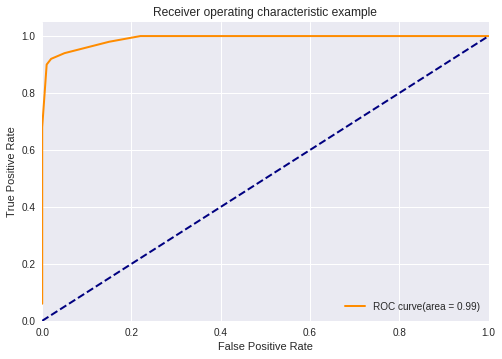

In [29]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve(area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()